In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Ecommerce Projext\ecommerce_analysis\data\Eccomerce Purchases.csv", encoding='latin1')


In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum() # Ver cuantos valores nulos hay

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#eleiminar filas con descripcion nula
df = df.dropna(subset=['Description'])

#eliminar filas con customer id nulo
df = df.dropna(subset=['CustomerID'])

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
# convertir InvoiceDate a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# convertir CustomerID a entero
df['CustomerID'] = df['CustomerID'].astype(int)

print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


In [11]:
#Extraer el año de la fecha
df['Year'] = df['InvoiceDate'].dt.year

#extraer la hora
df['Hour'] = df['InvoiceDate'].dt.hour

#extraer el mes 
df['Month'] = df['InvoiceDate'].dt.month

#extraer la hora con AM y PM
df['Hour'] = df['InvoiceDate'].dt.strftime('%I:%M %p')

#extraer el dia de la semana
df['Day'] = df['InvoiceDate'].dt.day_name()

#Extraer día del mes (número)
df['Day'] = df['InvoiceDate'].dt.day



In [12]:
#extraer el mes con el nombre
df['Month'] = df['InvoiceDate'].dt.month_name()

In [13]:
# Convertir Hour a datetime para extraer la hora en formato 24h
df['Hour_24'] = pd.to_datetime(df['Hour'], format='%I:%M %p').dt.hour


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Hour,Month,Day,Hour_24
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,08:26 AM,December,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,08:26 AM,December,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,08:26 AM,December,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,08:26 AM,December,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,08:26 AM,December,1,8


In [15]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Day,Hour_24
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,2010.934002,15.036128,12.737472
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,2010.000000,1.000000,6.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,2011.000000,7.000000,11.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,2011.000000,15.000000,13.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,2011.000000,22.000000,14.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011.000000,31.000000,20.000000
std,248.693370,NaN,69.315162,1713.600303,0.248279,8.653730,2.284952


In [16]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] # calcular el precio total por transaccion
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Hour,Month,Day,Hour_24,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,08:26 AM,December,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,08:26 AM,December,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,08:26 AM,December,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,08:26 AM,December,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,08:26 AM,December,1,8,20.34


In [17]:
#Exportar datos limpios a csv
df.to_csv('ecommerce_clean.csv', index=False)

In [ ]:
# top 10 productos mas vendidos
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64


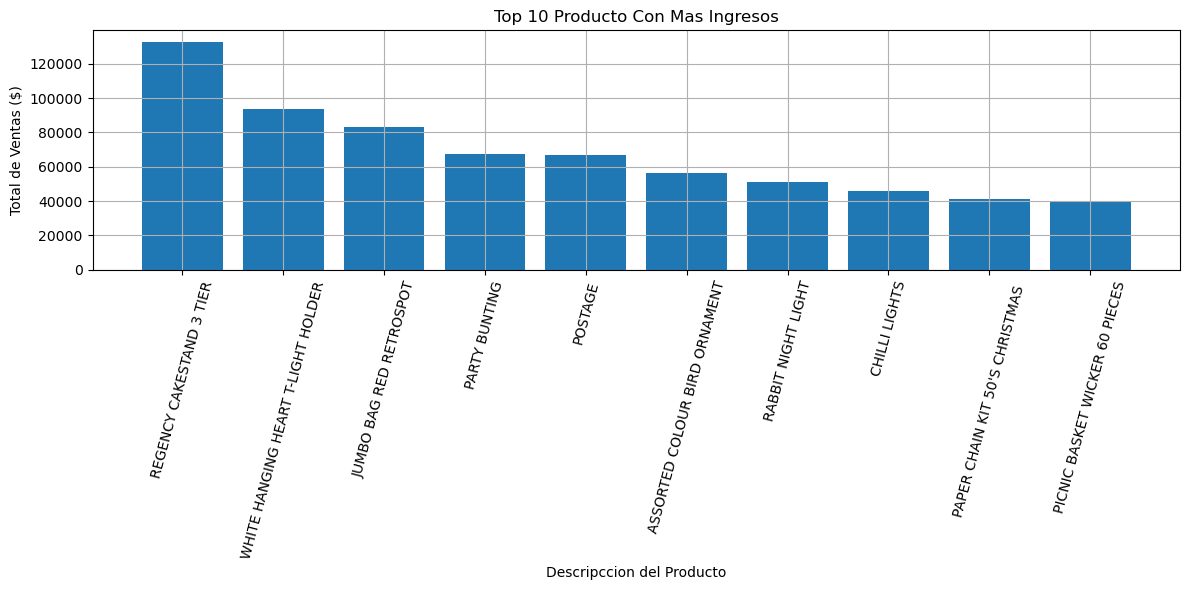

In [ ]:
# grafico top 10 productos mas Ingresos
plt.figure(figsize=(12, 6))
plt.bar(top_products.index, top_products.values)
plt.title('Top 10 Producto Con Mas Ingresos')
plt.xlabel('Descripccion del Producto')
plt.ylabel('Total de Ventas ($)')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# top 10 productos mas vendidos
top_revenue = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_revenue)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64


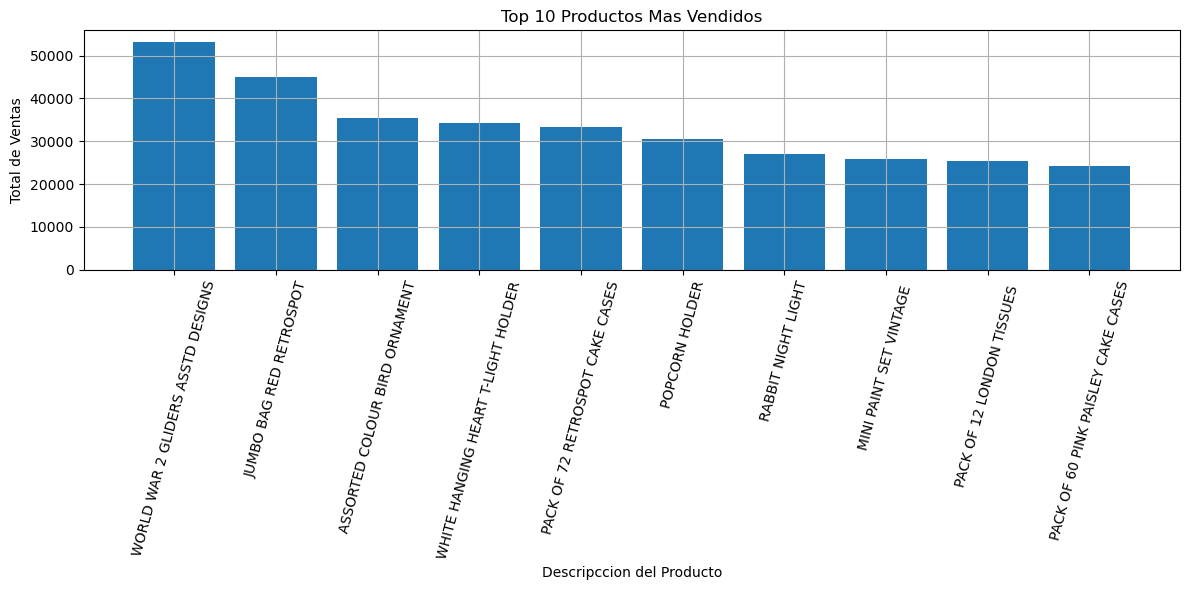

In [37]:
#grafico top 10 productos mas vendidos
plt.figure(figsize=(12, 6))
plt.bar(top_revenue.index, top_revenue.values)
plt.title('Top 10 Productos Mas Vendidos')
plt.xlabel('Descripccion del Producto')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Ventas por dia a lo largo del tiempo
ventas_diarias = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()


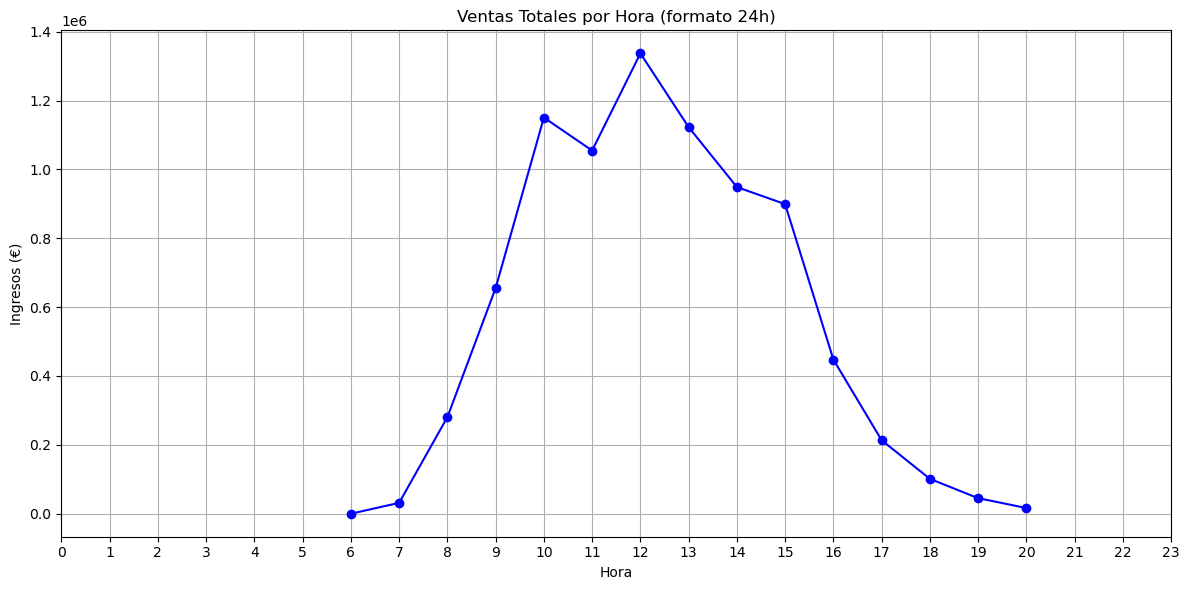

In [ ]:
#ventas por hora
ventas_por_hora = df.groupby('Hour_24')['TotalPrice'].sum()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(ventas_por_hora.index, ventas_por_hora.values, marker='o', color='blue')
plt.title('Ventas Totales por Hora (formato 24h)')
plt.xlabel('Hora')
plt.ylabel('Ingresos (€)')
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()


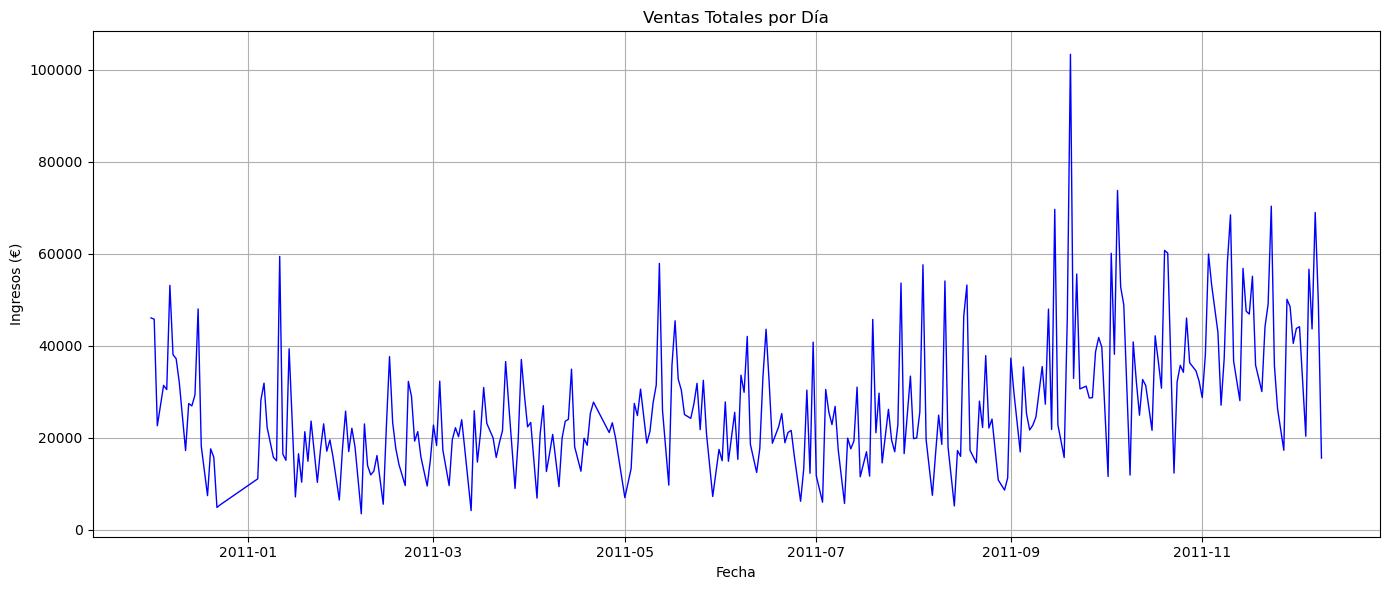

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(ventas_diarias.index, ventas_diarias.values, color='blue', linewidth=1)
plt.title('Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21288\3193035504.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()


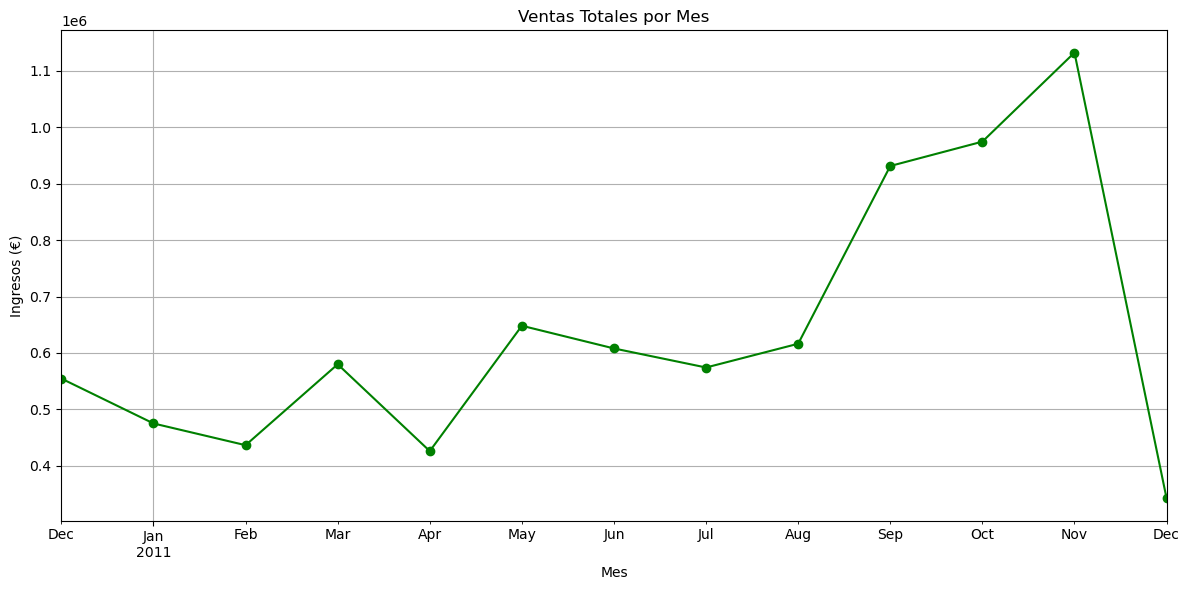

In [44]:
# Ventas por mes
ventas_mensuales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()

ventas_mensuales.plot(kind='line', figsize=(12,6), marker='o', color='green')
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos (€)')
plt.grid(True)
plt.tight_layout()
plt.show()


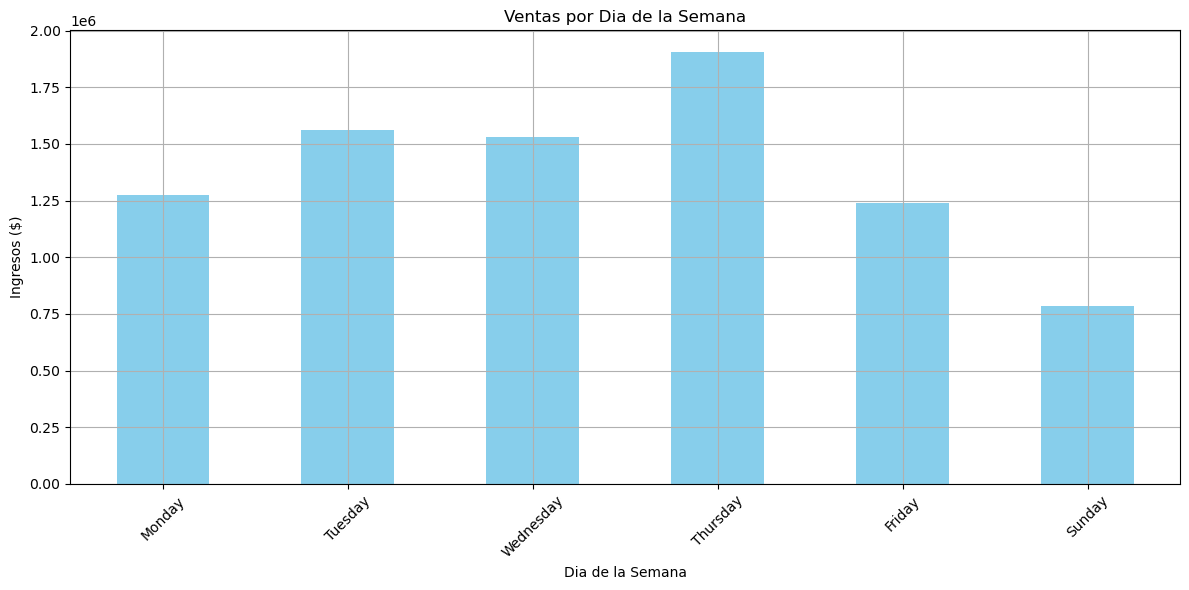

In [50]:
# Dia de la semana que se vendio mas
day_sort = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Sunday'   ]
ventas_por_dia = df.groupby('Day_Name')['TotalPrice'].sum().reindex(day_sort)

ventas_por_dia.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Ventas por Dia de la Semana')
plt.xlabel('Dia de la Semana')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


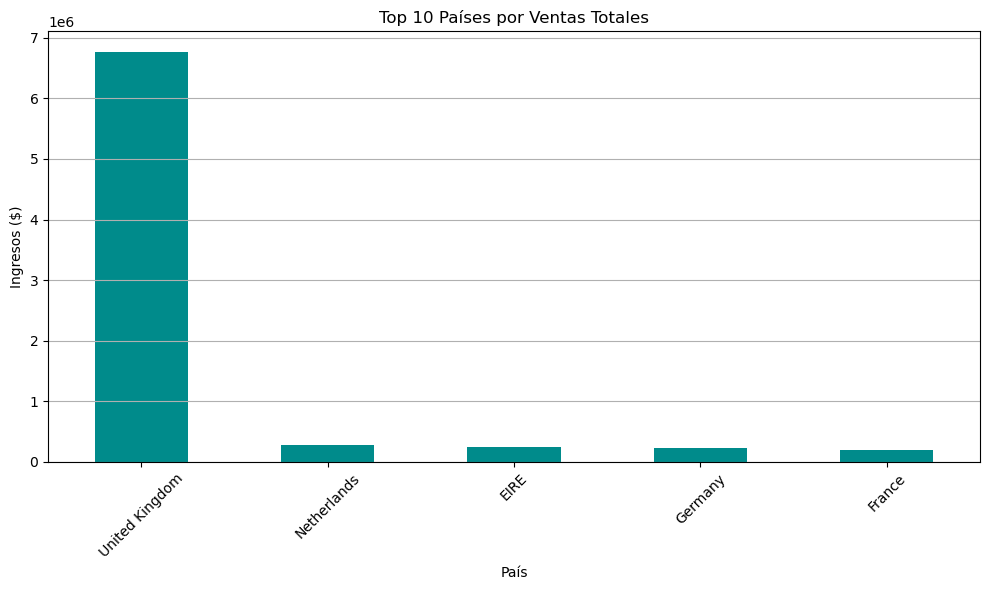

In [58]:
#Ventas por por pais
ventas_por_pais = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
ventas_por_pais.head(5).plot(kind='bar', figsize=(10,6), color='darkcyan')
plt.title('Top 10 Países por Ventas Totales')
plt.xlabel('País')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


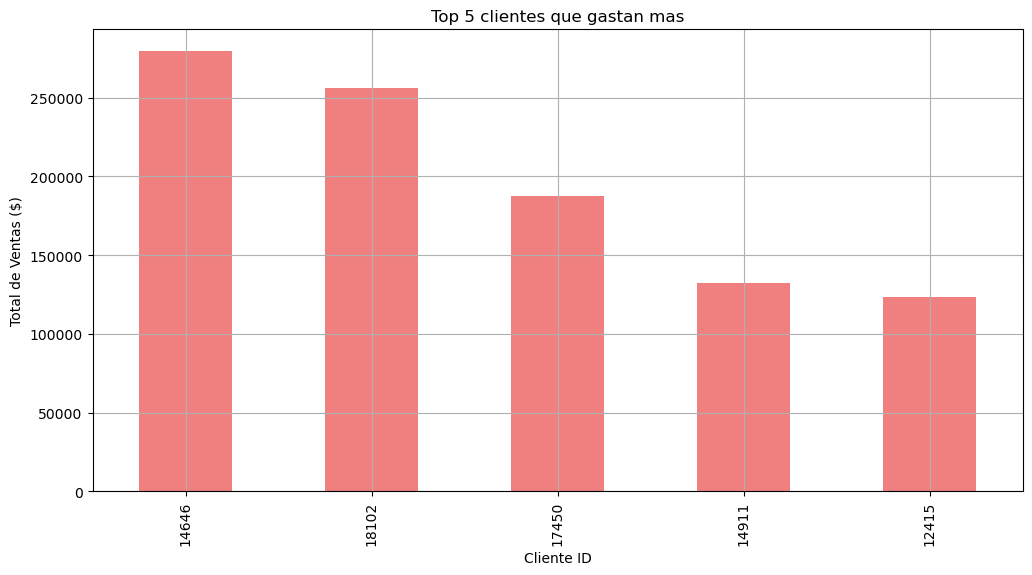

In [67]:
# cliente que gasta mas
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(5)  # obtener los 5 clientes que gastan mas
top_customers.plot(kind='bar', figsize=(12, 6), color='lightcoral', title='Top 5 clientes que gastan mas')
plt.xlabel('Cliente ID')   
plt.ylabel('Total de Ventas ($)')
plt.grid(True)
plt.show()

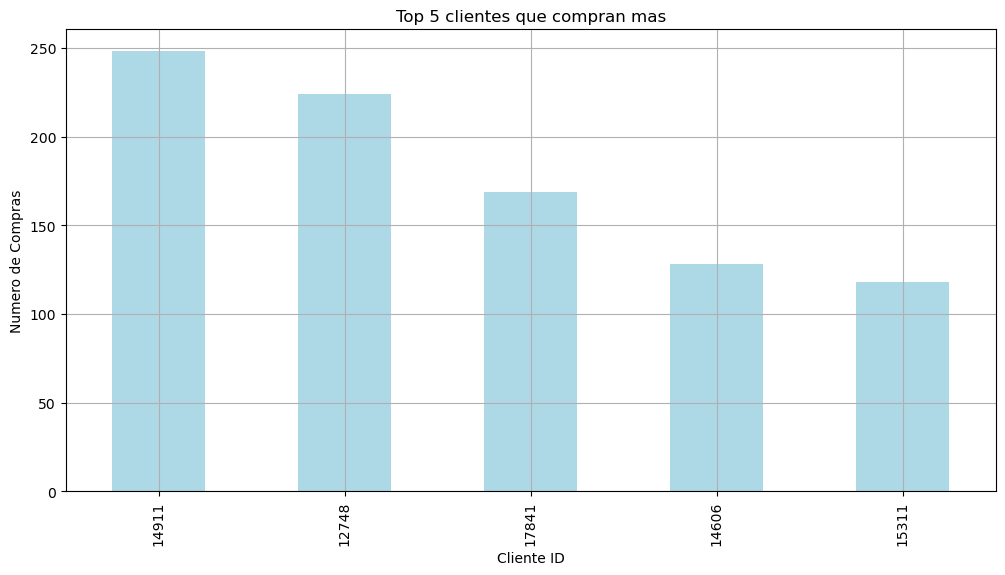

In [71]:
# Clientes que comran mas
top_customers_count = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(5)  # obtener los 5 clientes que compran mas
top_customers_count.plot(kind='bar', figsize=(12, 6), color='lightblue', title='Top 5 clientes que compran mas')
plt.xlabel('Cliente ID')
plt.ylabel('Numero de Compras')
plt.grid('y')
plt.show()

🎯 Recomendaciones para Marketing
Basado en los hallazgos del análisis de ventas:

🔢 Volumen de Datos
Se analizaron más de 400,000 transacciones, tras limpiar los valores nulos en las columnas Description y CustomerID.

🕑 Campañas en Horarios Clave
Las ventas se concentran entre las 10:00 AM y 14:00 PM.
→ Recomendación: Enfocar promociones, campañas de remarketing y correos automatizados en ese rango horario para mejorar la conversión.

📆 Días con Mayor Actividad
Los días martes y jueves presentan mayor volumen de ventas.
→ Recomendación: Utilizar estos días para lanzar descuentos especiales, correos promocionales y campañas de anuncios.

🌟 Enfocarse en Productos Estrella
Los productos más relevantes identificados fueron:

🛩️ Más vendido: WORLD WAR 2 GLIDERS

💰 Mayor ingreso: DOTCOM POSTAGE

→ Recomendación: Potenciar estos productos con bundles, promociones destacadas en la web y presencia en redes sociales.

👑 Clientes Más Valiosos
Un pequeño porcentaje de clientes genera una porción significativa de los ingresos.
→ Recomendación: Crear programas de fidelización, descuentos VIP, cupones exclusivos y campañas personalizadas para retenerlos.

🧠 Conclusiones Generales

Las ventas muestran patrones claros por hora y día, lo que permite dirigir esfuerzos de marketing con mayor precisión y eficiencia.

Unos pocos productos y países concentran la mayor parte del ingreso. Esto abre la puerta a estrategias de marketing segmentadas y focalizadas.

La mayoría de las ganancias proviene de una minoría de clientes, por lo que cuidarlos y premiar su lealtad es una inversión estratégica.

El comportamiento de compra es predecible y cíclico, lo que brinda una gran oportunidad para automatizar campañas, optimizar recursos y mejorar el retorno de inversión.